In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Base_rh.csv', encoding='latin1')
df

,Employee_ID,Name,Age,Department,Salary,Years_at_Company,Performance_Score,Last_Promotion_Year,Training_Hours,Sick_Days,Work_Location,Gender,Job_Level,Education_Level
0,1,Charlie,22,HR,99298.894478,12,3.469744,2019,143,3.060513,Hybrid,Female,Mid,Master's
1,2,Alice,57,HR,99409.409042,17,2.468877,2018,85,7.062246,Onsite,Other,Mid,PhD
2,3,Eve,31,Sales,131548.226986,14,2.841779,2019,102,4.316442,Remote,Other,Mid,High School
3,4,Diana,23,Marketing,67356.750400,5,1.191392,2019,29,7.617216,Hybrid,Female,Entry,PhD
4,5,Charlie,41,IT,130761.525363,15,3.404889,2018,107,3.190223,Remote,Female,Senior,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Diana,23,HR,105951.815756,10,3.686747,2018,106,2.626505,Onsite,Male,Entry,PhD
2996,2997,Charlie,38,IT,97341.610291,13,1.000000,2019,16,10.000000,Hybrid,Male,Entry,Bachelor's
2997,2998,Bob,22,Sales,98886.307138,5,3.811724,2019,105,2.376552,Remote,Female,Mid,High School
2998,2999,Bob,39,Marketing,127699.488790,15,3.130235,2018,106,4.739531,Remote,Other,Mid,High School


In [4]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Years_at_Company,Performance_Score,Last_Promotion_Year,Training_Hours,Sick_Days,Work_Location,Gender,Job_Level,Education_Level
0,1,Charlie,22,HR,99298.894478,12,3.469744,2019,143,3.060513,Hybrid,Female,Mid,Master's
1,2,Alice,57,HR,99409.409042,17,2.468877,2018,85,7.062246,Onsite,Other,Mid,PhD
2,3,Eve,31,Sales,131548.226986,14,2.841779,2019,102,4.316442,Remote,Other,Mid,High School
3,4,Diana,23,Marketing,67356.750400,5,1.191392,2019,29,7.617216,Hybrid,Female,Entry,PhD
4,5,Charlie,41,IT,130761.525363,15,3.404889,2018,107,3.190223,Remote,Female,Senior,PhD


In [6]:
df.isnull().sum()

Employee_ID              0
Name                     0
Age                      0
Department               0
Salary                 767
Years_at_Company         0
Performance_Score        0
Last_Promotion_Year      0
Training_Hours           0
Sick_Days                0
Work_Location            0
Gender                   0
Job_Level                0
Education_Level          0
dtype: int64

In [7]:
mean_salary = df['Salary'].mean()
print(mean_salary)

100145.13077415079


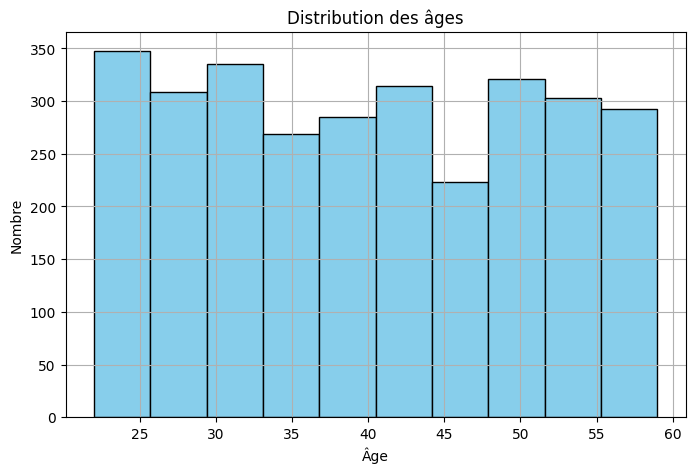

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.grid(True)
plt.show()

In [9]:
print("Statistiques sur l'âge :")
print(f"Âge moyen : {df['Age'].mean():.2f}")
print(f"Âge médian : {df['Age'].median()}")
print(f"Écart-type de l'âge : {df['Age'].std():.2f}")

Statistiques sur l'âge :
Âge moyen : 40.06
Âge médian : 40.0
Écart-type de l'âge : 10.98


In [29]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Department', 'Salary',
       'Years_at_Company', 'Performance_Score', 'Last_Promotion_Year',
       'Training_Hours', 'Sick_Days', 'Work_Location', 'Gender', 'Job_Level',
       'Education_Level'],
      dtype='object')

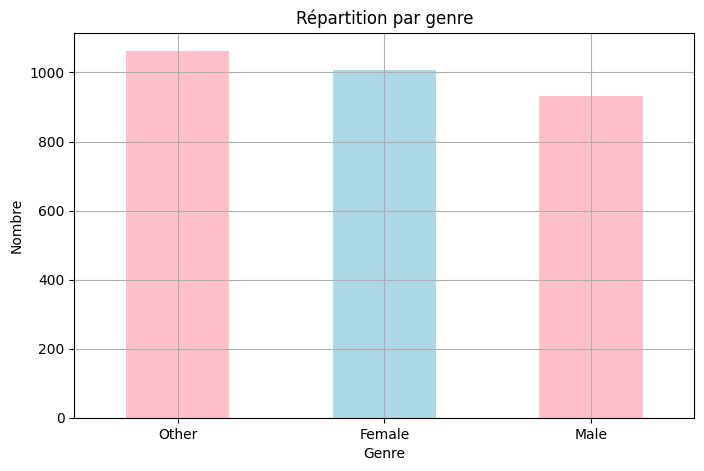

In [10]:
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Répartition par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

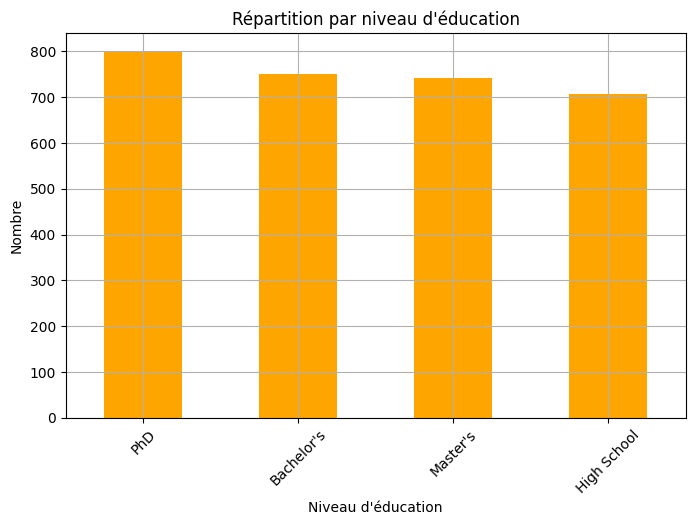

In [11]:
plt.figure(figsize=(8, 5))
df['Education_Level'].value_counts().plot(kind='bar', color='orange')
plt.title('Répartition par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
performance_by_dept_and_level = df.groupby(['Department', 'Job_Level'])['Performance_Score'].mean().reset_index()

In [13]:
print(performance_by_dept_and_level)

   Department Job_Level  Performance_Score
0     Finance     Entry           2.820672
1     Finance   Manager           3.110121
2     Finance       Mid           3.019217
3     Finance    Senior           3.038249
4          HR     Entry           2.924079
5          HR   Manager           3.105240
6          HR       Mid           3.010662
7          HR    Senior           2.921103
8          IT     Entry           3.001530
9          IT   Manager           3.112303
10         IT       Mid           2.936425
11         IT    Senior           2.972627
12  Marketing     Entry           2.790162
13  Marketing   Manager           2.950392
14  Marketing       Mid           2.998362
15  Marketing    Senior           3.207763
16      Sales     Entry           3.071245
17      Sales   Manager           2.871593
18      Sales       Mid           3.054016
19      Sales    Senior           3.108627


Text(0.5, 1.0, 'Scores de performance par département et niveau de poste')

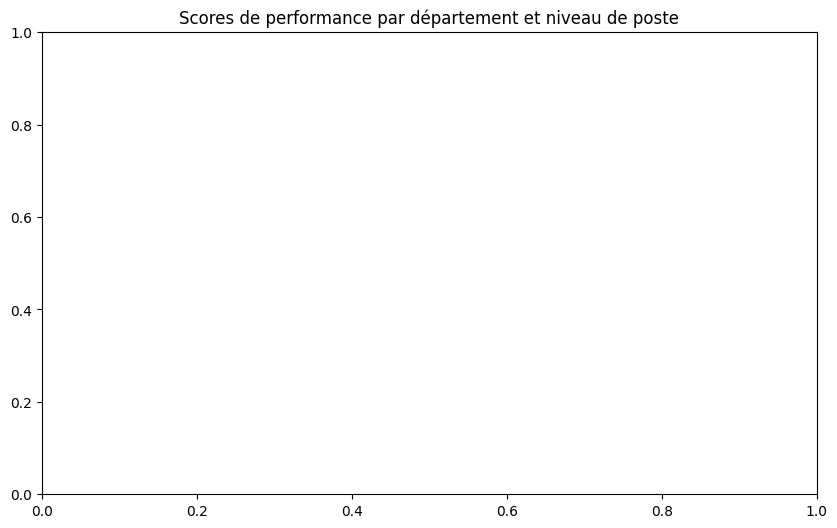

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Scores de performance par département et niveau de poste')

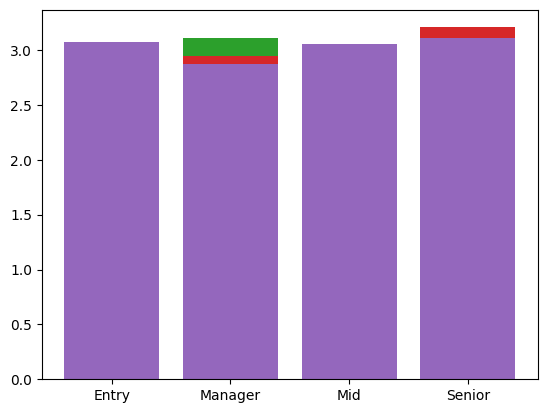

In [15]:
for department in performance_by_dept_and_level['Department'].unique():
    subset = performance_by_dept_and_level[performance_by_dept_and_level['Department'] == department]
    plt.bar(subset['Job_Level'], subset['Performance_Score'], label=department)

C:\Users\symph\AppData\Local\Temp\ipykernel_22088\201623604.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Département')


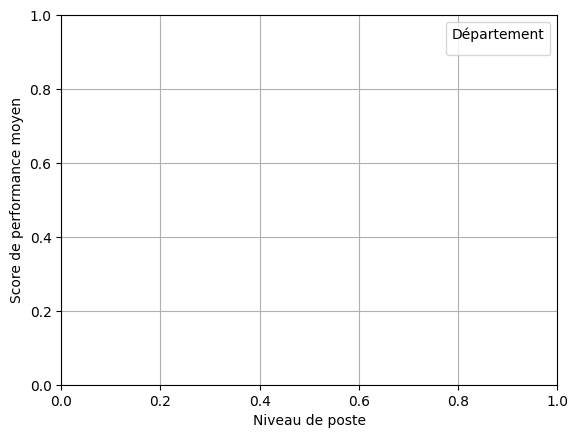

In [16]:
plt.xlabel('Niveau de poste')
plt.ylabel('Score de performance moyen')
plt.legend(title='Département')
plt.grid(True)
plt.show()

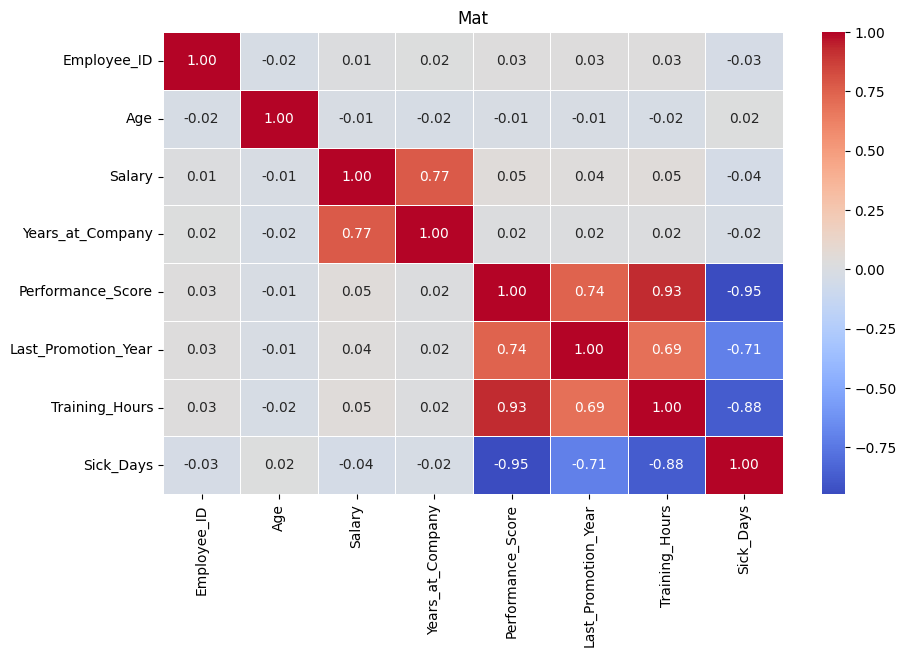

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mat')
plt.show()

In [19]:
low_performance = df[df['Performance_Score'] <= 2]

In [20]:
high_sick_days = df[df['Sick_Days'] > 10]

In [21]:
at_risk_employees = df[(df['Performance_Score'] <= 2) & (df['Sick_Days'] > 10)]

In [22]:
print(at_risk_employees)

Empty DataFrame
Columns: [Employee_ID, Name, Age, Department, Salary, Years_at_Company, Performance_Score, Last_Promotion_Year, Training_Hours, Sick_Days, Work_Location, Gender, Job_Level, Education_Level]
Index: []


In [23]:
long_term_employees = df[df['Years_at_Company'] > 10]

In [24]:
long_term_stats = long_term_employees[['Age', 'Performance_Score', 'Salary', 'Training_Hours', 'Sick_Days']].mean()
print(long_term_stats)

Age                      39.807339
Performance_Score         3.024859
Salary               114309.188940
Training_Hours          100.966126
Sick_Days                 4.917818
dtype: float64


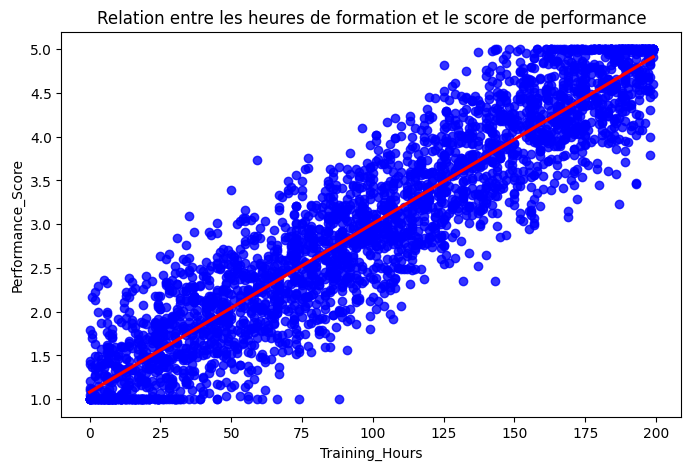

In [25]:
training_performance_corr = df[['Training_Hours', 'Performance_Score']].corr()
plt.figure(figsize=(8, 5))
sns.regplot(x='Training_Hours', y='Performance_Score', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Relation entre les heures de formation et le score de performance')
plt.show()

In [26]:
recent_promotion = df[df['Last_Promotion_Year'] == 2024]

In [27]:
pre_promotion_performance = df[df['Last_Promotion_Year'] < 2024]['Performance_Score'].mean()
post_promotion_performance = recent_promotion['Performance_Score'].mean()

In [28]:
print(f"Performance avant promotion : {pre_promotion_performance:.2f}")
print(f"Performance après promotion : {post_promotion_performance:.2f}")

Performance avant promotion : 3.00
Performance après promotion : nan


In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.8]
import numpy as np
np.fill_diagonal(strong_correlations.values, np.nan)



In [40]:
print(strong_correlations.dropna(how='all').dropna(axis=1, how='all'))

                   Performance_Score  Training_Hours  Sick_Days
Performance_Score                NaN        0.925265  -0.946803
Training_Hours              0.925265             NaN  -0.877732
Sick_Days                  -0.946803       -0.877732        NaN


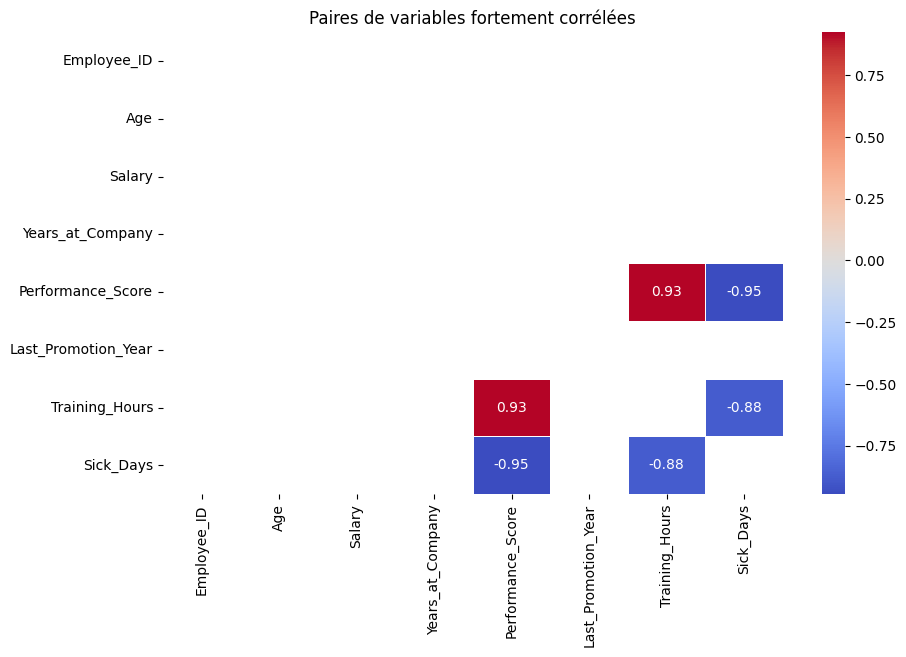

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=strong_correlations.isna())
plt.title('Paires de variables fortement corrélées')
plt.show()